# Three important tools to know

## `matplotlib`: graphical respresentation of data 

Matplolib is an extremely rich librairy for data visualization and there is no way to cover all its features in this note. The goal of this section is just to give short and practical examples to plot data. Much more details can be obtained on the [webpage](https://matplotlib.org/index.html). The following shows how to quickly make *histograms*, *graph*, *2D and 3D scatter plots*.


The main object of matplotlib is `matplotlib.pyplot` imported as `plt` here (and usually). The most common functions are then called on this objects, and often takes numpy arrays in argument (possibly with more than one dimension) and a lot of `kwargs` to define the plotting style.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example of 1D plots and histograms

To play with data, we generate 2 samples of 1000 values distributed according to a normal probability density function with $\mu=-1$ and $\mu=1$ respectively, and $\sigma=0.5$. These data are stored in a numpy array `x` of shape `x.shape=(1000, 2)`. We then simply compute and store the sinus of all these values into a same shape array `y`:

In [2]:
x = np.random.normal(loc=[-1, 1], scale=[0.5, 0.5], size=(1000,2))
y = np.sin(x)

The next step is to plot these data in two ways: first we want `y` v.s. `x`, second we want the histogram of the `x` values. We need to first create a figure, then create two *subplots* (specifying the number of line, column, and subplot index). Note that matplotlib take always the first dimension to define the numbers to plot, while higher dimensions are considered as other plots - automatically overlaid.

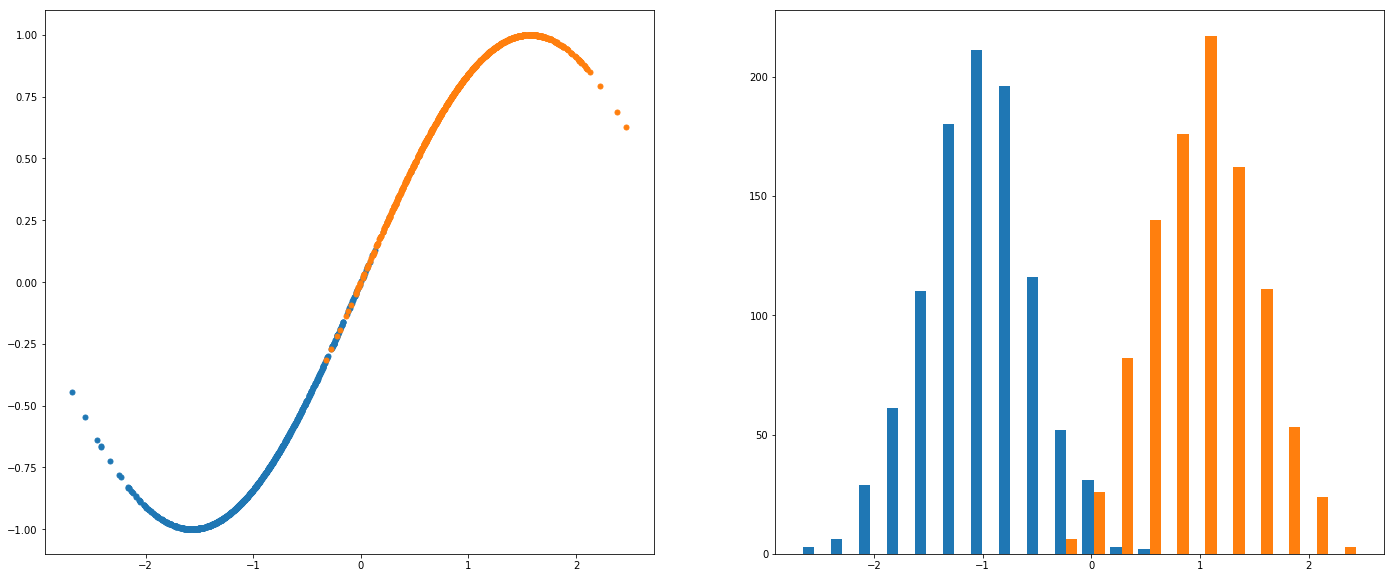

In [3]:
plt.figure(figsize=(24, 10))
plt.subplot(121) # 121 means 1 line, 2 column, 1st plot
plt.plot(x, y, marker='o', markersize=5, linewidth=0.0)
plt.subplot(122) # 122 means 1 line, 2 column, 2nd plot
plt.hist(x, bins=20);

### Example of 2D scatter plot

A scatter plot allows to draw marker in a 2D space and a thrid information is encoded into the marker size. In order to play, we generated two set of 5000 numbers distributed according to uncorrelated gaussians of $(\mu_0=\mu_1=0)$ and $(\sigma_1,\sigma_2)=(0.5, 0.8)$ in a numpy array `points` of shape `points.shape=(5000,2)`. These two sets of numbers are then interepreted as $(x,y)$ positions being loaded in two `(5000, 1)` arrays `x` and `y`:

In [4]:
points = np.random.normal(loc=[0, 0], scale=[0.5, 0.8], size=(5000,2))
x, y = points[:, 0], points[:, 1]

We can then plot the 5000 points in the 2D plan, and here we specify the marker size at $100\times\sin^2(x)$ using the argument `s` of `the plt.scatter()` function (note that the array `x`, `y` and `s` must have the same shape):

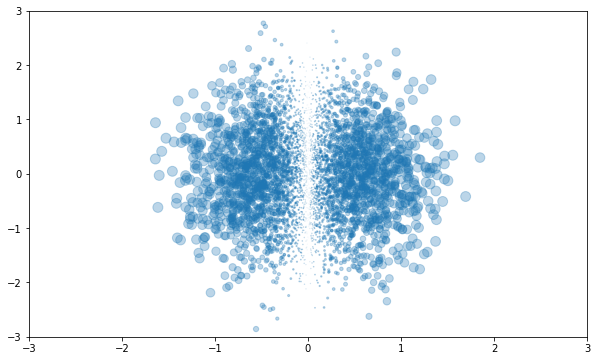

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=100*(np.sin(x))**2, marker='o', alpha=0.3)
plt.xlim(-3, 3)
plt.ylim(-3, 3);

### Example of 3D plots

For 3D plots, one can generate 1000 positions in space, and operate a translation by a vector $\vec{r}_0$ using broadcasting:

In [6]:
data = np.random.normal(size=(1000, 3))
r0 = np.array([1, 4, 2])
data_trans = data + r0

It is then easy to get back the spatial initial (*i.e.* before translation) and final (*i.e.* after translation) coordinates:

In [7]:
xi, yi, zi = data[:,0], data[:,1], data[:,2]
xf, yf, zf = data_trans[:,0], data_trans[:,1], data_trans[:,2]

An additional module must be imported in order to plot data in three dimensions, and the projection has to be stated. Once it's done, a simple call to `ax.scatter3D(x,y,z)` does the plot. Note that we call a function of `ax` and not `plt` as before. This is due to the `ax = plt.axes(projection='3d')` command which is needed for 3D plotting. More details are available on the [matplotlib 3D tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html).

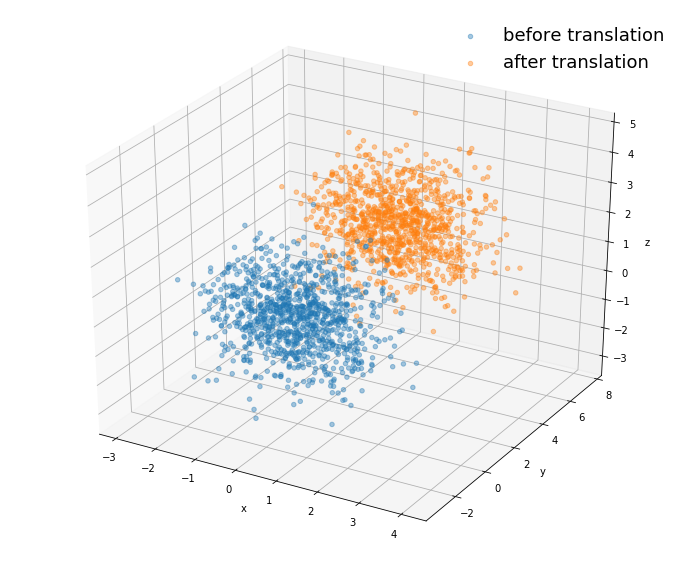

In [8]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(xi, yi, zi, alpha=0.4, label='before translation')
ax.scatter3D(xf, yf, zf, alpha=0.4, label='after translation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(frameon=False, fontsize=18);

### Example of 2D function $z=f(x, y)$: notion of `meshgrid`

Another typical plot we might want to do is to represent a function of two variables $(x,y)$ in 3D: $z=f(x,y)$. In python this implies the notion of *meshgrid* which is not trivial at first. Let's first define a 2 variable function:

In [9]:
def my_surface(x, y):
    x0 = 5*np.sin(y)
    sigma = 5+y
    amp = (10-y)
    return amp*np.exp(-(x-x0)**2/sigma**2)

Let's define a $(x, y)$ interval on which we want to describe the surface:

In [10]:
x = np.linspace(-40, 40, 100)
y = np.linspace(0, 20, 200)

These two numpy arrays don't have the same shape and an explicit loop would be needed to process them - which is very time consuming in python. This is where the *meshgrid* notion comes: it will provide a two arrays *with the same size* and allow then the vectorization:

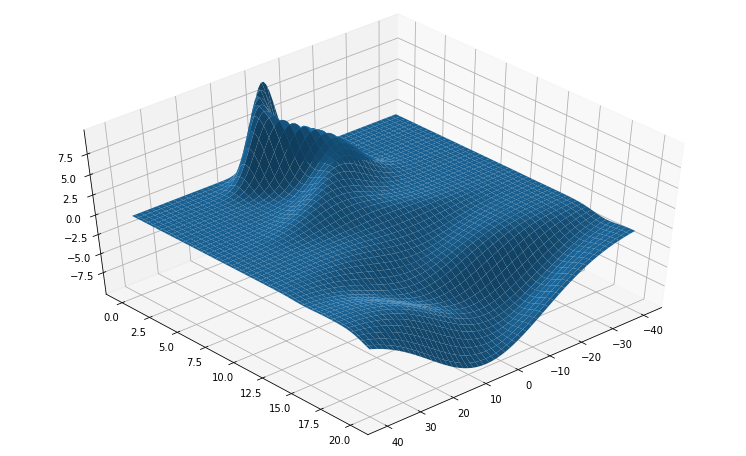

In [11]:
# Meshgrid and function application
xx, yy = np.meshgrid(x, y)
Z = my_surface(xx, yy)

# Plotting
fig = plt.figure(figsize=(13,8))
ax = fig.gca(projection='3d', )
ax.plot_surface(xx, yy, Z)

# Choose the default view
ax.view_init(azim=48, elev=48)

##  `pandas`: import and manipulate data as numpy array

The package `pandas` is an very rich interface to read data from different format and produce a `pandas.dataframe` that can be based on `numpy` (but contanining a lot more features). There is no way to fully desribe this package here, the goal is simply to give functional and concrete example easily usable. More more details, please check the [pandas webpage](https://pandas.pydata.org/).


Many build-in functions are available to import data as pandas dataframe. One, which is particularly convenient, directly reads csv files (one can specify the columns to loads, the row to skip, and many other options ...):

In [12]:
import pandas as pd
df = pd.read_csv('../data/WaveData.csv')
print(df.head())

          Date/Time      Hs   Hmax      Tz      Tp  Peak Direction    SST
0  01/01/2017 00:00 -99.900 -99.90 -99.900 -99.900           -99.9 -99.90
1  01/01/2017 00:30   0.875   1.39   4.421   4.506           -99.9 -99.90
2  01/01/2017 01:00   0.763   1.15   4.520   5.513            49.0  25.65
3  01/01/2017 01:30   0.770   1.41   4.582   5.647            75.0  25.50
4  01/01/2017 02:00   0.747   1.16   4.515   5.083            91.0  25.45


In [13]:
# Rename columns names using df.rename() function
old_new_cols = {
    'Date/Time': 'date',
    'Hs': 'height',
    'Hmax': 'heightMax',
    'Tz': 'period',
    'Tp': 'energy',
    'Peak Direction': 'direction',
    'SST': 'temperature'
}

df.rename(columns=old_new_cols, inplace=True)
print(df.head())

               date  height  heightMax  period  energy  direction  temperature
0  01/01/2017 00:00 -99.900     -99.90 -99.900 -99.900      -99.9       -99.90
1  01/01/2017 00:30   0.875       1.39   4.421   4.506      -99.9       -99.90
2  01/01/2017 01:00   0.763       1.15   4.520   5.513       49.0        25.65
3  01/01/2017 01:30   0.770       1.41   4.582   5.647       75.0        25.50
4  01/01/2017 02:00   0.747       1.16   4.515   5.083       91.0        25.45


This is possible to clean the dataframe using some masking syntax. First, let's check how many default values are stored for each column (all but the date):

In [14]:
# Check which wave has -99 values for every variables
for c in ['height', 'heightMax', 'period', 'energy', 'direction', 'temperature']:
    n = np.count_nonzero(df[c]<=-99)
    print('{}: {} wave have <=-99'.format(c, n))

height: 85 wave have <=-99
heightMax: 85 wave have <=-99
period: 85 wave have <=-99
energy: 85 wave have <=-99
direction: 271 wave have <=-99
temperature: 262 wave have <=-99


In [15]:
# Simply take value above -99
print(df[df>-99].head())

               date  height  heightMax  period  energy  direction  temperature
0  01/01/2017 00:00     NaN        NaN     NaN     NaN        NaN          NaN
1  01/01/2017 00:30   0.875       1.39   4.421   4.506        NaN          NaN
2  01/01/2017 01:00   0.763       1.15   4.520   5.513       49.0        25.65
3  01/01/2017 01:30   0.770       1.41   4.582   5.647       75.0        25.50
4  01/01/2017 02:00   0.747       1.16   4.515   5.083       91.0        25.45


In [16]:
# Removing all entry (line) which has at least one default value
for c in ['height', 'heightMax', 'period', 'energy', 'direction', 'temperature']:
    df = df[df[c]>-99]

print(df.head())

               date  height  heightMax  period  energy  direction  temperature
2  01/01/2017 01:00   0.763       1.15   4.520   5.513       49.0        25.65
3  01/01/2017 01:30   0.770       1.41   4.582   5.647       75.0        25.50
4  01/01/2017 02:00   0.747       1.16   4.515   5.083       91.0        25.45
5  01/01/2017 02:30   0.718       1.61   4.614   6.181       68.0        25.45
6  01/01/2017 03:00   0.707       1.34   4.568   4.705       73.0        25.50


We can now check how many default value we get:

In [17]:
for c in ['height', 'heightMax', 'period', 'energy', 'direction', 'temperature']:
    n = np.count_nonzero(df[c]<=-99)
    print('{}: {} wave have <=-99'.format(c, n))

height: 0 wave have <=-99
heightMax: 0 wave have <=-99
period: 0 wave have <=-99
energy: 0 wave have <=-99
direction: 0 wave have <=-99
temperature: 0 wave have <=-99


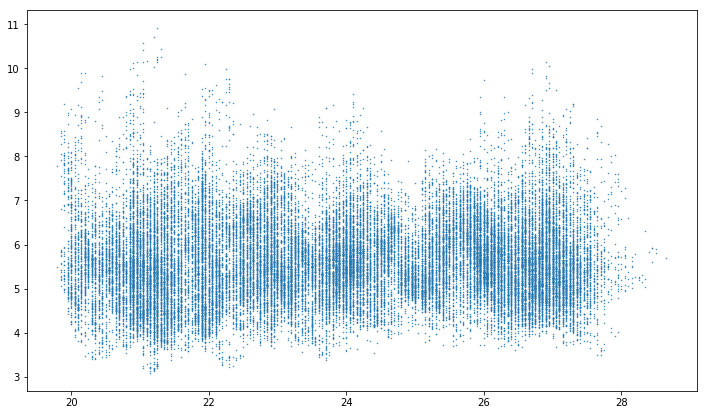

In [18]:
# Disable interactive matplotlib
%matplotlib inline

# Plot temperature vs period
plt.figure(figsize=(12, 7))
plt.scatter(df['temperature'], df['period'], s=0.2);

On of the nice feature of pandas is to be able to easily get numpy array, compute and store the result as a new column. For instance, it's a common practice in machine learning to *normalize* the input variables, *i.e.* transform them to have a mean of 0 and a variance of 1.0. The following example shows how to add new column which are normalized:

In [19]:
def add_normalized_variable_to_df(col):

    # Get a numpy arrays
    v = df[col].values

    # Replace NaN by 0.0
    v[np.isnan(v)] = 0
    
    # Compute quantities
    v_mean = np.mean(v)
    v_rms = np.sqrt(np.mean((v-v_mean)**2))

    # Add them into the pandas dataframe
    df[col+'_normalized'] = (v-v_mean)/v_rms
    
    return


for c in ['height', 'heightMax', 'period', 'energy', 'direction', 'temperature']:
    add_normalized_variable_to_df(c)

# Get only normalized column
normalized_cols = [c for c in df.columns.tolist() if '_normalized' in c]
print(df[normalized_cols].head())

   height_normalized  heightMax_normalized  period_normalized  \
2          -0.898215             -1.047342          -1.184338   
3          -0.884973             -0.757690          -1.117565   
4          -0.928484             -1.036201          -1.189723   
5          -0.983346             -0.534881          -1.083102   
6          -1.004155             -0.835673          -1.132643   

   energy_normalized  direction_normalized  temperature_normalized  
2          -1.463956             -2.044360                0.762152  
3          -1.407891             -0.973294                0.694918  
4          -1.643866             -0.314176                0.672506  
5          -1.184467             -1.261658                0.672506  
6          -1.802020             -1.055683                0.694918  


One can simply plot the content of a pandas dataframe using the name of the column. For instance, one can compare the evolution of $H_T$ after each transformation (which is trivial in this illustrative case):

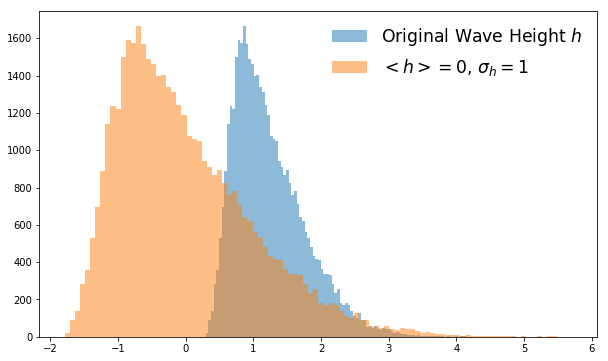

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['height'], bins=100, alpha=0.5, label='Original Wave Height $h$')
plt.hist(df['height_normalized'], bins=100, alpha=0.5, label='$<h> = 0$, $\sigma_{h}=1$')
plt.legend(frameon=False, fontsize='xx-large');

There are also many plotting function already included into the pandas library. To show only one example (all functions are decribed in the [pandas visualization tutorial](https://pandas.pydata.org/pandas-docs/stable/visualization.html)), here is the *scatter matrix* between variables (defined as a subset of the ones stored the dataframe) obtained in a single line of code:

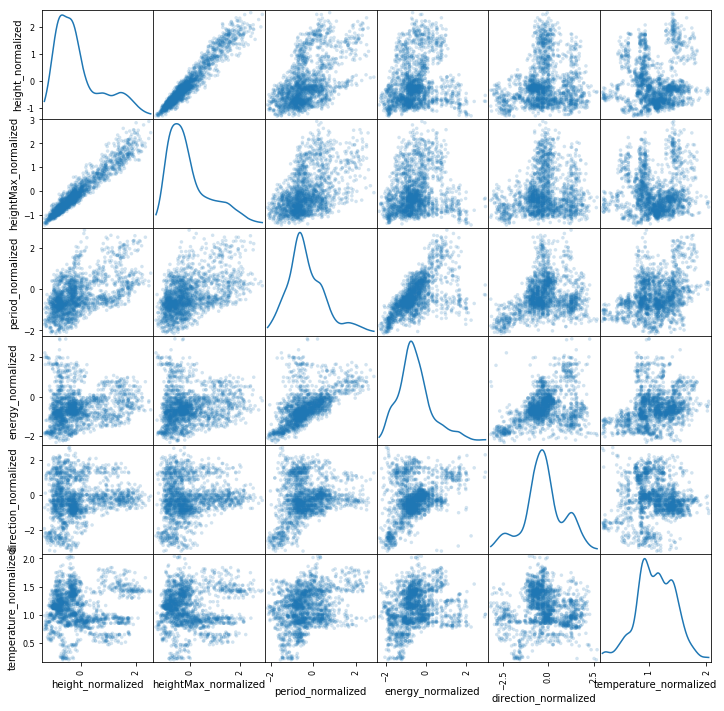

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[normalized_cols][:2000], figsize=(12, 12), alpha=0.2, s=50, diagonal='kde');

## `scipy`: mathematics, physics and engineering

The [scipy](https://scipy.org/) project is python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, the following core package are part of it: NumPy, matplotlib, pandas, [scipy library](https://docs.scipy.org/doc/scipy-1.2.0/reference/) (very quickly introduced here) and [SymPy](https://www.sympy.org/en/index.html) (symbolic calculations with mathematical expressions *a la* mathematica). 

Obviously, there is no way to extensively present the scipy library in this short introduction, but one can quickly summarize few features and illustrate one with a concrete and useful example: fitting data points with a function. Among the main features, the SciPy library contains:

  + Integration (`scipy.integrate`): integrals, differential equations, etc ...
  + Optimization (`scipy.optimize`): minimization, fits, etc ...
  + Interpolation (`scipy.interpolate`): smoothing methods, etc ...
  + Fourier Transforms (`scipy.fftpack`): spectral analysis, etc ...
  + Signal Processing (`scipy.signal`): transfer functions, filtering, etc ...
  + Linear Algebra (`scipy.linalg`): matrix operation, diagonalisation, determinant, etc ...
  + Statistics (`scipy.stats`): random number, probability density function, cumulative distribution, etc ...

In [22]:
from scipy import optimize
from scipy import stats

Let's now show how to perform a fit of data with error bar using one particular function of `scipy.optimize`. First, we need to generate some data where we choose 20 measurements, with some noise of ~30% and an combined uncertainty of an absolute 0.1 uncertainty and 10% relative uncertainy: 

In [23]:
Npoints, Nsampling = 20, 1000
xcont = np.linspace(-5.0, 3.5, Nsampling)
x = np.linspace(-5, 3.0, Npoints)
y = 2*(np.sin(x/2)**2 + np.random.random(Npoints)*0.3)
dy = np.sqrt(0.10**2 + (0.10*y)**2)

Then we need to define functions with which we want to fit our data, for example a degree 1 polynoms. The syntax has to be `func(x, *pars)`:

In [24]:
def pol1(x, p0, p1):
    return p0 + x*p1

The following lines actually perform the fit and return both the optimal parameters and the covariances for the dgree 1 polynom:

In [25]:
p, cov = optimize.curve_fit(pol1, x, y, sigma=dy)

One can then generalize the procedure by plotting the result of the fit for polynoms of several degrees, after having plotted the data. This is a good way to compare different models for the same data. First, we define an arbitrary degree polynom `plo_func()` and we *vectorize* it using `np.vectorize` so that it can accept NumPy arrays:

In [26]:
def pol_func(x, *coeff):
    '''Arbitrary degree polynom: f(x) = a0 + a1*x + a2*x^2 + ... aN*x^N'''
    a = np.array([coeff[i]*x**i for i in range(len(coeff))])
    return np.sum(a)

pol_func = np.vectorize(pol_func)

In the previous call for `optimize.curve_fit()`, we didn't use additional arguement. For this example, we need to specify at least the starting point of the parameters `p0` *because the number of paramter will be assessed using `len(p0)` (it's not known a priori since it is dynamically allocated)*. Other options can be specified, such as the miminum and maximum allowed values of parameters. Here is a wrapp-up function performing the fit for an arbitrary polynom degree:

In [27]:
def fit_polynom(degree):
    nPars = degree+1
    p0, pmin, pmax = [1.0]*nPars, [-10]*nPars, [10]*nPars
    fit_options = {'p0': p0, 'bounds': (pmin, pmax), 'check_finite': True}
    par, cov = optimize.curve_fit(pol_func, x, y, sigma=dy, **fit_options)
    return par, cov

degree_max = 12

The following code try every polynomial functions up to a degree `degree_max=`, perform the fit and overlay the the result for each together with the experimental data on the same figure:

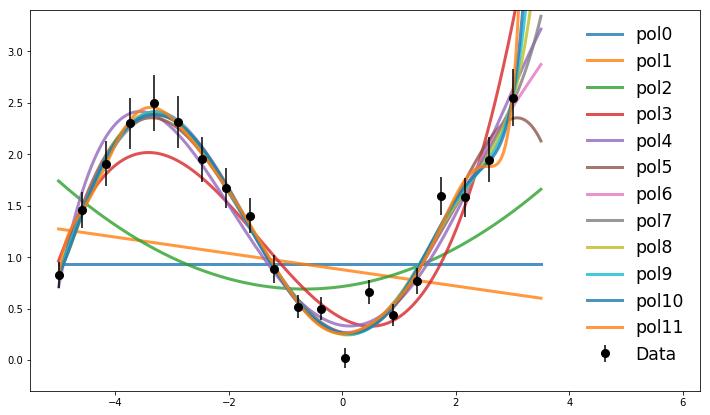

In [28]:
# Figure for the result
fig = plt.figure(figsize=(12,7))

# Fitting & plotting 
for d in np.arange(0, degree_max):
    par, cov = fit_polynom(d)
    plt.plot(xcont, pol_func(xcont, *par), label='pol{}'.format(d), 
             linewidth=3, alpha=0.8)

# Plotting data
style = {'marker': 'o', 'color': 'black', 'markersize': 8,
         'linestyle': '', 'zorder': 10, 'label': 'Data'}
plt.errorbar(x, y, yerr=dy, **style)

# Plot cosmetics
plt.xlim(-5.5, 6.3)
plt.ylim(-0.3, 3.4)
plt.legend(frameon=False, fontsize='xx-large');

It is possible to quantify how well a given model explain the observations, computing what we call the *goodness of fit*. In a frequentist approach, this can be assessed by the fraction of pseudo-data coming from - in principle - repeating the exact same experiment, with to a worst agreement for a given model. The agreement can be quantified using $\chi^2 = \sum^{n}_{i=1} \frac{(y_i - f(x_i))^2}{{\sigma_i}^2}$ and its probability density function (PDF) directly gives access to the fraction of "worst pseudo-data" (by integrating the PDF from $\chi^2$ to $\infty$). More precisely, one can use the cumulative distribution function (CDF) of $\chi^2$ computed with $n$ degrees of freedom, for instance `Npoins`, *i.e.* `len(x)`. More details can be found, for examble, in the [statistics review of the Particle Data Group](http://pdg.lbl.gov/2018/reviews/rpp2018-rev-statistics.pdf). The following two functions allow to compute the goodness of fit:

In [29]:
def get_chi2_nDOF(y, dy, yfit):
    r = (y-yfit)/dy
    return  np.sum(r**2), len(y)

def get_pvalue(chi2, nDOF):
    return 1-stats.chi2.cdf(chi2, df=nDOF)

We can now perform all these fits and extract the goodness of fit ($\chi^2$ and $p$-value) for each model:

In [30]:
# Fitting and getting p-value
degree, chiSquare, pvalue = [], [], []
for d in np.arange(degree_max):
    par, cov = fit_polynom(d)
    c2, n = get_chi2_nDOF(y, dy, pol_func(x, *par))
    degree.append(d), chiSquare.append(c2), pvalue.append(get_pvalue(c2, n))

The following piece of code plot both the $\chi^2$ and the $p$-value versus the degree of the polynom using two different $y$-axis. This gives another way to use matplolib by defining explicit object such as `ax` and `fig` and call methods on those (called *stateless appraoch*), instead of using function on `plt` (called *stateful approach*). For more details on these different approaches, see this [RealPython post](https://realpython.com/python-matplotlib-guide/#the-matplotlib-object-hierarchy).

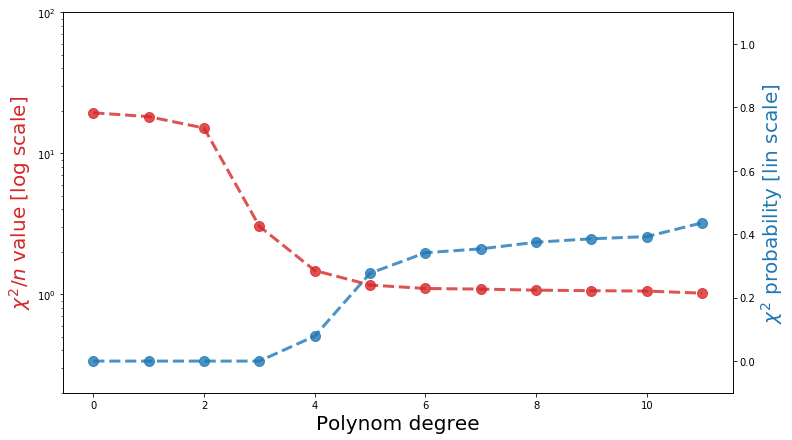

In [31]:
# Plotting the result with 2 different axis
fig, ax1 = plt.subplots(figsize=(12,7))
ax1.set_xlabel('Polynom degree', fontsize=20)
style = {'marker': 'o', 'markersize': 10, 'alpha': 0.8, 
         'linestyle': '--', 'linewidth': 3}

# Plot chi2/n
ax1.semilogy(degree, np.array(chiSquare)/Npoints, color='tab:red', **style)
ax1.set_ylim(0.2, 100)
ax1.set_ylabel('$\chi^2/n$ value [log scale]', color='tab:red', fontsize=20)

# Plot p-values
ax2 = ax1.twinx()
ax2.plot(degree, pvalue, color='tab:blue', **style)
ax2.set_ylim(-0.1, 1.1)
ax2.set_ylabel('$\chi^2$ probability [lin scale]', color='tab:blue', fontsize=20);

This is also possible to know whether two models give a similar description or if one model is better than the other. This is called the *F-test*, based on the residual sum of square $RSS \equiv \sum (y_i-f(x_i))^2$ (RSS). For a fit of $n$ data points with a model M1 defined by $p_1$ parameters with $RSS_1$ and a model M2 defined by $p_2$ parameters with $RSS_2$ *with $p_2>p_1$*, the F-test is defined by:

$$
F(M1, M2) = \frac{ \left(\frac{RSS_1 - RSS_2 }{p_2-p_1}\right)} {\left(\frac{RSS_2}{n-p_2}\right)}
$$

If the $p$-value of $F$ is close to 1.0, it means that the two model are equally compatible with data and there is no indication that a choice should be made. In that case, one would favour the simplest model with less paramters. If the $p$-value of $F$ is close to 0, then the two compared model are actually different and one has to select one.

Let's first define the RSS function and compute it over all the polynoms:

In [32]:
def get_RSS(y, yfit):
    return np.sum((y-yfit)**2)

RSS = []
for d in np.arange(degree_max):
    par, cov = fit_polynom(d)
    RSS.append(get_RSS(y=y, yfit=pol_func(x, *par)))

Then, one can define a function to actually compare two degrees where $d_2$ must be larger than $d_1$:

In [33]:
def compare_pol_pq(d1, d2):
    
    # Sanity checks
    if d1 not in degree or d2 not in degree:
        raise NameError('Degree no supported')
    if d2<d1:
        d2, d1 = d1, d2
    
    # Extract M1 and M2 numbers
    RSS1, p1 = RSS[d1], d1+1
    RSS2, p2 = RSS[d2], d2+1
    
    # F-value & p-value
    Fval = (RSS1-RSS2)/(p2-p1) * (Npoints-p2)/RSS2
    pval = 1-stats.f.cdf(x=Fval, dfn=p2-p1, dfd=Npoints-p2)
    
    return Fval, pval

Plot the F-test values and its $p$-values for the comparison between $d-1$ and $d$ starting from $d=3$. This plot shows that from $d=6$, there is a faire compatibility between the models (at worst $15$%):

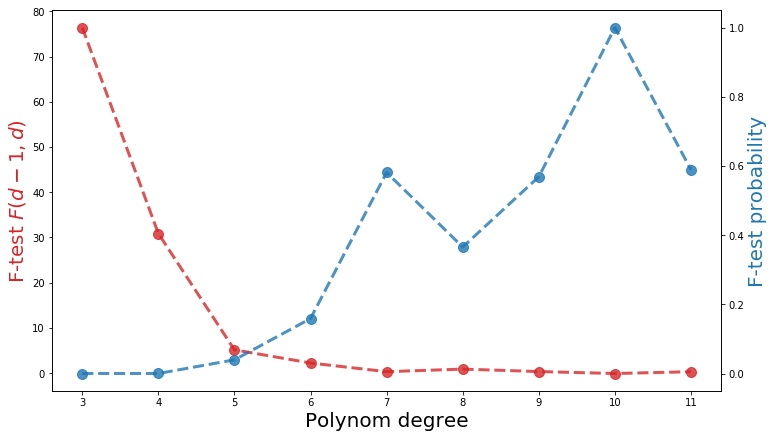

In [42]:
# Computing Ftest comparisons starting from degree 4
dmin, compare = 3, compare_pol_pq
dinf, dsup = np.arange(dmin-1, degree_max), np.arange(dmin, degree_max)
result = np.array([compare(d1, d2) for d1, d2 in zip(dinf, dsup)])
Ftest, pval = result[:, 0], result[:, 1]

# Plotting figure and syle the results
fig, ax1 = plt.subplots(figsize=(12,7))
ax1.set_xlabel('Polynom degree', fontsize=20)
style = {'marker': 'o', 'markersize': 10, 'alpha': 0.8, 
         'linestyle': '--', 'linewidth': 3}

# Plot of F-test values
ax1.plot(dsup, Ftest, color='tab:red', **style)
ax1.set_ylabel('F-test $F(d-1,d)$', color='tab:red', fontsize=20)

# Plot of p-values
ax2 = ax1.twinx()
ax2.plot(dsup, pval, color='tab:blue', **style)
ax2.set_ylabel('F-test probability', color='tab:blue', fontsize=20);

In order to effectively check by eye that the F-test give a sensible information, one can plot the cumulative sum of fit residus $(y-f(x))^2$ and the F-test probability side-by-side: 

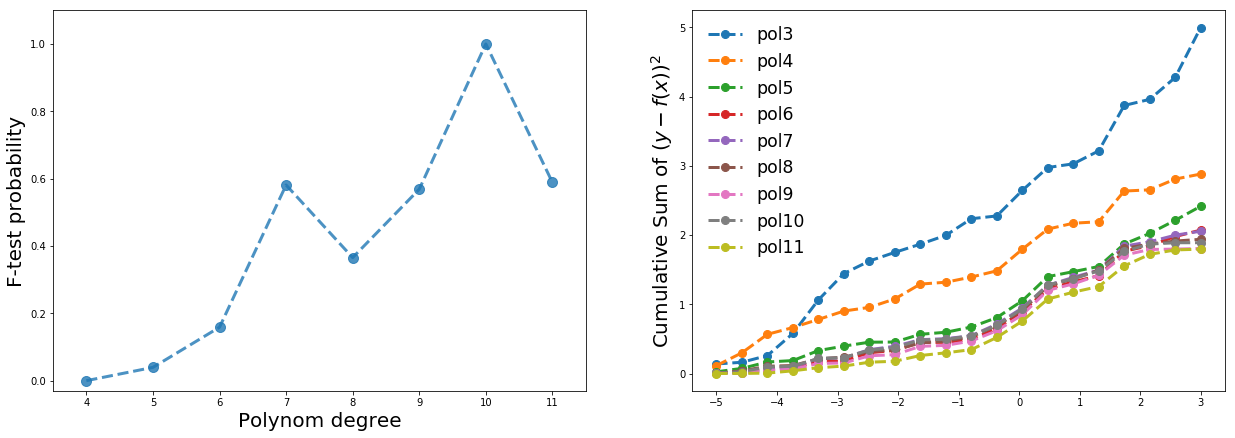

In [40]:
# Plotting figure and syle the results
plt.figure(figsize=(21,7))
style = {'marker': 'o', 'markersize': 10, 'alpha': 0.8, 
         'linestyle': '--', 'linewidth': 3}

# Plot of F-test values
plt.subplot('121')
plt.plot(dsup[1:], pval[1:], **style)
plt.ylabel('F-test probability' , fontsize=20);
plt.xlabel('Polynom degree', fontsize=20)
plt.xlim(3.5, 11.5)
plt.ylim(-0.03, 1.1)

# Putting the cumsum of fit residus aside
plt.subplot('122')
style = {'marker': 'o', 'markersize': 8,
         'linestyle': '--', 'linewidth': 3}
for d in np.arange(3, degree_max):
    par, cov = fit_polynom(d)
    RSScum = np.cumsum(np.abs(y-pol_func(x, *par)))
    plt.plot(x, RSScum, label='pol{}'.format(d), **style)
plt.legend(frameon=False, fontsize='xx-large');
plt.ylabel('Cumulative Sum of $(y-f(x))^2$', fontsize=20);

We can then see on these 2 plots that indeed, comparing low degrees polynoms (like $d=4$ and $d=3$) leads to q large difference (and thus a low F-test probability), while comparing high degrees polynoms (*e.g.* $d=6$ and $d=5$) leads to very similar prediction meaning a sizable F-test probability. On sees that the probability that $d=10$ is similar to $d=10$ is quite low, which can be probably understood by a quite different RSS (last point on the right plot above for `pol11` and `pol10`).